In [112]:
%load_ext autoreload
%autoreload 2
%connect_info
%pprint 1
from datetime import datetime
from typing import Sequence, Tuple, Union
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from functools import partial
from dataclasses import dataclass
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from IPython.display import display

import logging
import sys

sys.path.append('..')

import dno
from dno.proto.utils import get_project_root
from dno.proto.data import Map
import qgrid
from loguru import logger
qgrid.enable()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{
  "shell_port": 51280,
  "iopub_port": 51281,
  "stdin_port": 51282,
  "control_port": 51283,
  "hb_port": 51284,
  "ip": "127.0.0.1",
  "key": "f9bd3b97-4e29160d78351a96c7229557",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-aaac3ef1-abf8-4b1c-997d-e852c29dbca5.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
Pretty printing has been turned OFF


In [113]:
from dno.proto.mock import MockInterop

In [114]:
def fit_all(regs: list, train_features, train_labels):
    for regressor in regs:
        date_started = datetime.now()
        print(f"Starting training {regressor.__class__.__name__}...")
        regressor.fit(X=train_features, y=train_labels)
        print(f"Finished training {regressor.__class__.__name__}: took {datetime.now() - date_started}")

def evaluate(models, test_features, test_labels, error_fn=lambda pred, test: np.abs(pred - test)):
    accuracies = []
    for model in models: 
        predictions = model.predict(test_features)
        errors = error_fn(predictions, test_labels)
        mape = 100 * np.mean(np.abs(predictions - test_labels) / test_labels)
        print(f'Model Performance for {model.__class__.__name__}')
        print(f'Average Error: {np.mean(errors):0.4f}.')
        print(f'MAPE = {mape:0.2f}%.')
        print(f'Accuracy = {100 - mape:0.2f}%.')
        accuracies.append(mape)
    
    return accuracies

def print_info(regs: list):
    for regressor in regs:
        print(f"{regressor.__class__.__name__}:\n{regressor.get_params()}")
        
def print_regression_info(regs: list, train_features, train_labels, test_features, test_labels):
    for regressor in regs:
        print(f"{regressor.__class__.__name__} score [train]: {regressor.score(X=train_features,y=train_labels )}")
        print(f"{regressor.__class__.__name__} score [test ]: {regressor.score(X=test_features,y=test_labels )}")
        header_feature = {}
        if hasattr(regressor, 'feature_importances_') or hasattr(regressor, 'coef_'):
            feature_importances = getattr(regressor, 'feature_importances_', getattr(regressor, 'coef_', None))
            for idx, imp in enumerate(feature_importances):
                header_feature[train_features.columns[idx]] = imp
            formatted_fi = [
                f'{f}: {x:.2f}' 
                for f,x in sorted(header_feature.items(), key=lambda x: x[1], reverse=True) 
                if x > 0.01
            ]
            print(f"{regressor.__class__.__name__} Features     : {formatted_fi}")
        else:
            print(f"{regressor.__class__.__name__} has no feature importances.")


In [124]:
csv_root = get_project_root() / "data" / "csvs"
tasks = [path.name for path in csv_root.glob('task*')]
original_data = pd.read_csv(get_project_root() / "data" / "csvs" / "task27.csv")
data = original_data.copy()
qgrid.show_grid(data)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [125]:
# ------- FINISH HIM -----------
maps = {
    
}

def get_maps(tasks: Sequence[str]) -> Sequence[Map]:
    pass
    

In [130]:

def get_all_dfs(tasks):
    for ax, task in tasks:
        yield pd.read_csv(csv_root / task)

def visualize_all(tasks, x, ncols=3, nrows=None,
                  show=['height'], columns_to_normalize=['height', 'x', 'y']):
    nrows = nrows or int(np.ceil(len(tasks)/ncols))
    fig, axes = plt.subplots(nrows=nrows, figsize=(20, 4*nrows), 
                             ncols=ncols, sharex='row', )
    plt.subplots_adjust(hspace=1)
    for ax, task in zip(axes.flatten()[:len(tasks)], tasks):
        data = pd.read_csv(csv_root / task)
        logger.debug(columns_to_normalize)
        logger.debug(data.columns)
        scaler = StandardScaler().fit(data[columns_to_normalize])
        std = scaler.transform(data[columns_to_normalize])
        data[columns_to_normalize] = std
        #data = pd.DataFrame(data=std, columns=data.columns)
        ax.set_xlabel('iteration (num)')
        ax.set_title(f"Task {task}")
        for show_plot in show:
            ax.scatter(x=x or data.index, y=data[show], )


2019-03-31 05:09:49.686 | DEBUG    | __main__:visualize_all:14 - ['height']
2019-03-31 05:09:49.688 | DEBUG    | __main__:visualize_all:15 - Index(['Unnamed: 0', '_psi_cos', '_psi_sin', 'height', 'psi', 'speed', 'vx',
       'vy', 'x', 'y'],
      dtype='object')
e:\source\repos\argus\projects\best.hack\finals\.venv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
e:\source\repos\argus\projects\best.hack\finals\.venv\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
2019-03-31 05:09:49.725 | DEBUG    | __main__:visualize_all:14 - ['height']
2019-03-31 05:09:49.726 | DEBUG    | __main__:visualize_all:15 - Index(['Unnamed: 0', '_psi_cos', '_psi_sin', 'height', 'psi', 'speed', 'vx',
       'vy', 'x', 'y'],
      dtype='object')
e:\source\repos\argus\projects\best

2019-03-31 05:09:50.137 | DEBUG    | __main__:visualize_all:14 - ['height']
2019-03-31 05:09:50.139 | DEBUG    | __main__:visualize_all:15 - Index(['Unnamed: 0', '_psi_cos', '_psi_sin', 'height', 'psi', 'speed', 'vx',
       'vy', 'x', 'y'],
      dtype='object')
e:\source\repos\argus\projects\best.hack\finals\.venv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
e:\source\repos\argus\projects\best.hack\finals\.venv\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
2019-03-31 05:09:50.171 | DEBUG    | __main__:visualize_all:14 - ['height']
2019-03-31 05:09:50.173 | DEBUG    | __main__:visualize_all:15 - Index(['Unnamed: 0', '_psi_cos', '_psi_sin', 'height', 'psi', 'speed', 'vx',
       'vy', 'x', 'y'],
      dtype='object')
e:\source\repos\argus\projects\best

e:\source\repos\argus\projects\best.hack\finals\.venv\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
2019-03-31 05:09:50.508 | DEBUG    | __main__:visualize_all:14 - ['height']
2019-03-31 05:09:50.510 | DEBUG    | __main__:visualize_all:15 - Index(['Unnamed: 0', '_psi_cos', '_psi_sin', 'height', 'psi', 'speed', 'vx',
       'vy', 'x', 'y'],
      dtype='object')
e:\source\repos\argus\projects\best.hack\finals\.venv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
e:\source\repos\argus\projects\best.hack\finals\.venv\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
2019-03-31 05:09:50.538 | DEBUG    | __main__:visualize_all:14 - ['height']
2019-03-31 05:09:50.539 |

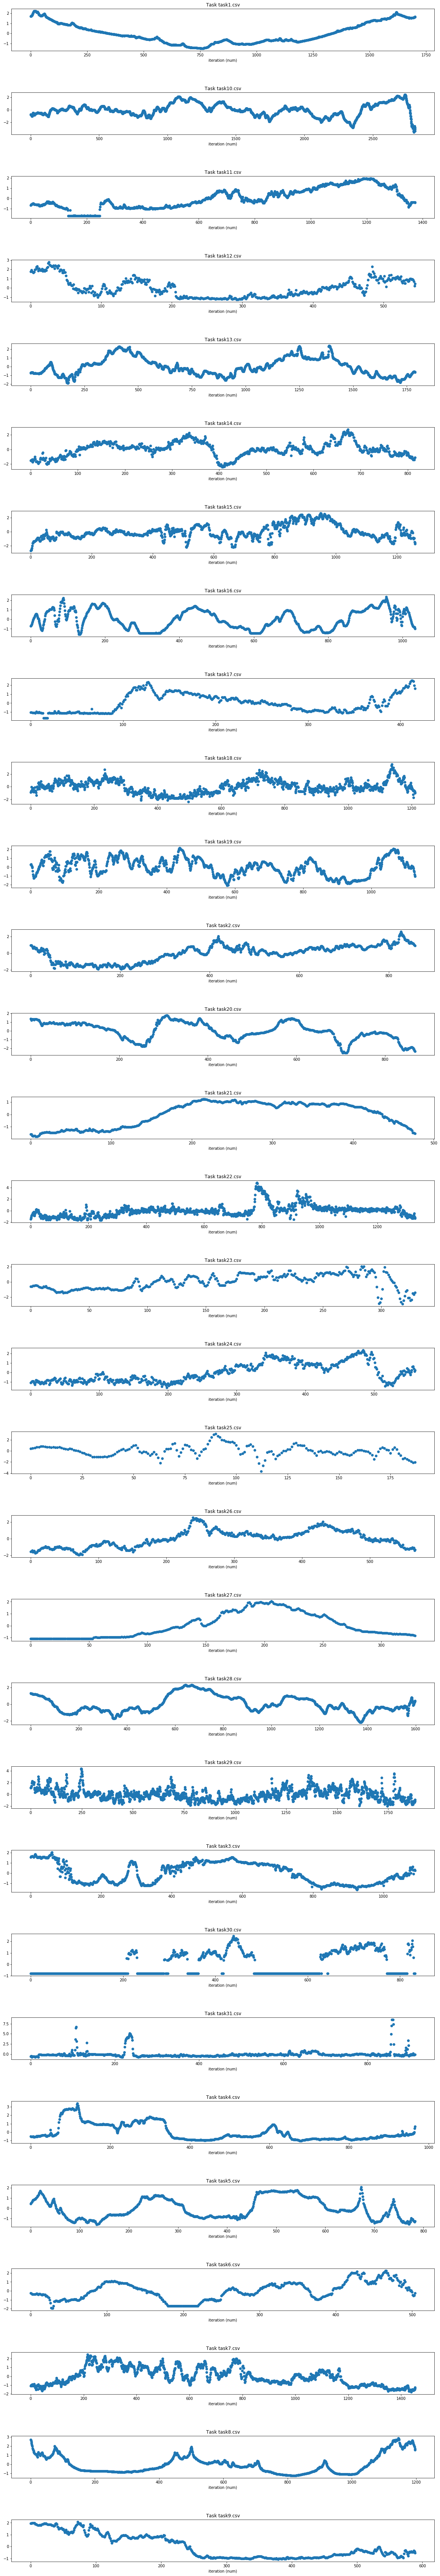

In [132]:
visualize_all(tasks, ncols=1, x=None, columns_to_normalize=['height'], show=['height'])

In [ ]:
regressors = [GradientBoostingRegressor()]
data['prevX'] = np.roll(data['x'].values, 1)
data['prevY'] = np.roll(data['y'].values, 1)
data = data.ix[1:]

In [5]:
X = data[['speed', 'vx', 'vy', 'psi', 'prevX', 'prevY', 'height', 'speed']]

X['height'] = StandardScaler().fit(X['height'].values.reshape(-1, 1)).transform(X['height'].values.reshape(-1, 1))
Y = data[['y']].values
X_train, X_test = train_test_split(X)
y_train, y_test = train_test_split(Y)
fit_all(regressors, X_train, y_train)
evaluate(regressors, X_test, y_test)
print_regression_info(regressors, X_train, y_train, X_test, y_test)

e:\source\repos\argus\projects\best.hack\finals\.venv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
e:\source\repos\argus\projects\best.hack\finals\.venv\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
e:\source\repos\argus\projects\best.hack\finals\.venv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
e:\source\repos\argus\projects\best.hack\finals\.venv\lib\site

Starting training GradientBoostingRegressor...
Finished training GradientBoostingRegressor: took 0:00:00.139527
Model Performance for GradientBoostingRegressor
Average Error: 222.5826.
MAPE = 48.79%.
Accuracy = 51.21%.
GradientBoostingRegressor score [train]: 0.19754865909145392
GradientBoostingRegressor score [test ]: 0.0011057569912285015
GradientBoostingRegressor Features     : ['height: 0.43', 'prevX: 0.20', 'prevY: 0.14', 'vy: 0.10', 'psi: 0.07', 'vx: 0.06']


In [6]:
def fit_grid(regs, spaces, cv: int=5):
    trained_regressors = []
    for regressor, space in zip(regs, spaces):
        date_started = datetime.now()
        print(f"Running grid search for {regressor.__class__.__name__}...")
        grid_search = GridSearchCV(regressor, space, verbose=10, cv=cv, n_jobs=2)
        grid_search_data = grid_search.fit(X=X_train, y=y_train)
        trained_regressors.append(grid_search.best_estimator_)
        print(f"Finished grid search for {regressor.__class__.__name__} in {datetime.now() - date_started}")
    return trained_regressors

In [7]:
from sklearn.model_selection import GridSearchCV


grids = [{
  # Number of trees in random forest
  "n_estimators": [int(x) for x in np.linspace(start=200, stop=1500, num=6)],
  # Maximum number of levels in tree
  "max_depth": [*[int(x) for x in np.arange(7, 14, step=1)], None],
  ## Minimum number of samples required to split a node
  #"min_samples_split": [2, 5, 10],
  ## Minimum number of samples required at each leaf node
  #"min_samples_leaf": [1, 2, 4],
  ## Method of selecting samples for training each tree
  #"bootstrap": [True, False]
},
{
  # Number of estimators in gradient boosting
  "n_estimators": [int(x) for x in np.linspace(start=200, stop=1500, num=3)],
  # Number of optimization passes
  "learning_rate": [x for x in np.logspace(start=0.01, stop=1, num=5)],
  # Maximum number of levels in tree
  "max_depth": [*[int(x) for x in np.arange(2, 10, step=1)]],
},
{
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'sigmoid'],
    'gamma': ['auto', 'scale', 0.01, 0.1, 1],
    'max_iter': [500, 1000]
}]

grid_classifiers = [GradientBoostingRegressor()]

In [8]:
trained = fit_grid([grid_classifiers[0]], spaces=[grids[1]], cv=2)

Running grid search for GradientBoostingRegressor...


ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.